# Class 14 Practice: Simple Linear Regression and Evaluation

Welcome to Week 5, Class 4! Today, you’ll build your first machine learning model: a **linear regression** model using scikit-learn. You’ll train it, make predictions, evaluate its performance with **mean squared error (MSE)**, and visualize the results. By the end, you’ll complete a **mini-project** to predict house prices.

## Objectives
- Understand how **linear regression** works to predict continuous variables.
- Train a linear regression model and make predictions.
- Evaluate model performance using mean squared error (MSE).
- Visualize predictions with a scatter plot and regression line.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. What is Linear Regression?

**Linear regression** is a machine learning method to predict a continuous variable by fitting a straight line to the data. For example, predicting house prices based on size (square footage) assumes a linear relationship: larger houses cost more.

**How it works**:
- The model finds the best line (y = mx + b) where:
  - `y` is the predicted value (e.g., price).
  - `x` is the feature (e.g., size).
  - `m` is the slope, `b` is the intercept.
- The model learns `m` and `b` to minimize prediction errors.

**Question**: If you predict house prices using size, what’s one reason the predictions might not be perfect?

**Your Answer**: [Type here, e.g., 'Other factors like location also affect price.']

## 2. Training a Linear Regression Model

Let’s train a model on a small dataset of house sizes (sqft) and prices. We’ll use scikit-learn to:
1. Load and split the data.
2. Train the model.
3. Make predictions.

Run the cell below to see it in action.

In [2]:
# Import libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample dataset: House sizes (sqft) and prices ($)
sizes = np.array([1000, 1500, 2000, 2500, 3000]).reshape(-1, 1)  # Feature
prices = np.array([200000, 250000, 300000, 350000, 400000])       # Label

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(sizes, prices, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the slope (m) and intercept (b)
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Slope (m): 100.00
Intercept (b): 100000.00


**Explanation**:
- `sizes` is the feature (X), `prices` is the label (y).
- `model.fit(X_train, y_train)` trains the model to find the best line.
- The slope and intercept define the line (e.g., price = m * size + b).

**Question**: Based on the slope, how much does the price increase per square foot?

**Your Answer**: [Type here, e.g., 'About $100 per sqft (check slope).']

## 3. Making Predictions

Once trained, the model can predict prices for new house sizes. Let’s predict the price for the test set and a new house (e.g., 1800 sqft).

Run the cell below.

In [3]:
# Predict prices for the test set
y_pred = model.predict(X_test)

# Predict price for a new house (1800 sqft)
new_size = np.array([[1800]])
new_price = model.predict(new_size)

# Print results
print(f"Test set actual prices: {y_test}")
print(f"Test set predicted prices: {y_pred}")
print(f"Predicted price for 1800 sqft house: ${new_price[0]:.2f}")

Test set actual prices: [250000]
Test set predicted prices: [250000.]
Predicted price for 1800 sqft house: $280000.00


**Question**: Are the predicted prices close to the actual prices? Why might there be differences?

**Your Answer**: [Type here, e.g., 'They’re close, but small differences come from the model’s simplicity.']

## 4. Evaluating the Model

We use **mean squared error (MSE)** to measure how good the model is. MSE calculates the average squared difference between actual and predicted values:
- Lower MSE = better model.
- Formula: MSE = (1/n) * Σ(actual - predicted)²

Run the cell below to compute MSE.

In [4]:
# Import MSE
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.00


**Question**: Is this MSE high or low? (Hint: Compare to price scale, e.g., $200,000).

**Your Answer**: [Type here, e.g., 'It seems reasonable since it’s small compared to house prices.']

## 5. Visualizing the Results

Let’s plot the data and the regression line to see how well the model fits.

Run the cell below.

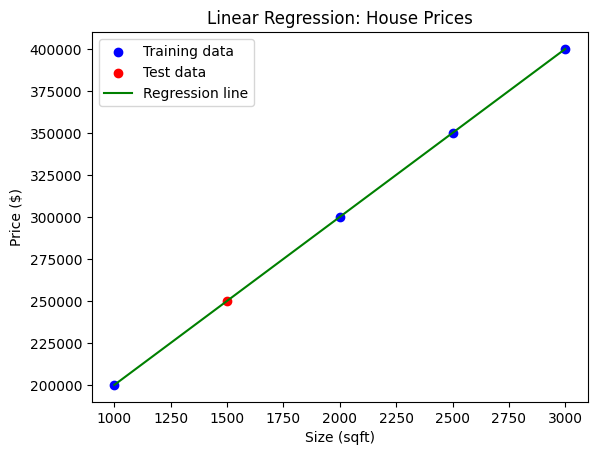

In [5]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot training data (blue dots)
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Plot test data (red dots)
plt.scatter(X_test, y_test, color='red', label='Test data')
# Plot regression line
plt.plot(sizes, model.predict(sizes), color='green', label='Regression line')

# Labels and title
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression: House Prices')
plt.legend()
plt.show()

**Question**: Does the regression line fit the data well? Why or why not?

**Your Answer**: [Type here, e.g., 'It fits well since most points are close to the line.']

## 6. Mini-Project: Predict House Prices

Now it’s your turn! You’ll build a linear regression model on a slightly larger house price dataset. Follow these steps:
1. Load the dataset (provided below).
2. Split it into training (80%) and testing (20%) sets.
3. Train a linear regression model.
4. Predict prices for the test set.
5. Calculate MSE.
6. Visualize the results.

**Dataset**: House sizes (sqft) and prices ($), stored in a pandas DataFrame.

In [6]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset

df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# Encode categorical columns if any
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [9]:
# Assuming 'price' is the target
y = df_encoded['price']
X = df_encoded.drop('price', axis=1)


Mean Squared Error: 1754318687330.6638


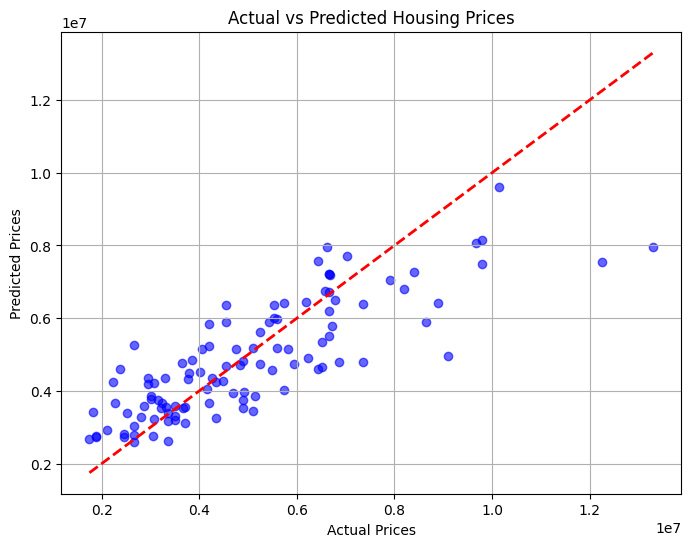

In [10]:
# # Encode categorical columns if any
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Assuming 'price' is the target
# y = df_encoded['price']
# X = df_encoded.drop('price', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation using MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.show()


# Task
- print y_test and y_pred side by side

In [11]:

# print y_test and y_pred side by side
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

      Actual     Predicted
316  4060000  5.164654e+06
77   6650000  7.224722e+06
360  3710000  3.109863e+06
90   6440000  4.612075e+06
493  2800000  3.294646e+06
..       ...           ...
15   9100000  4.973331e+06
357  3773000  4.336651e+06
39   7910000  7.059063e+06
54   7350000  6.398941e+06
155  5530000  6.363890e+06

[109 rows x 2 columns]


**Tasks**:
- Run the code above and check the MSE and plot.
- Answer: Is the model good? Why or why not? (Hint: Look at MSE and plot.)

**Your Answer**: [Type here, e.g., 'The model seems good; MSE is low, and the line fits most points closely.']

## 7. Reflection

**Question**: What did you learn about linear regression from this mini mediu-project? How could you improve the model? (1-2 sentences)

**Your Answer**: [Type here, e.g., 'I learned that linear regression predicts well for simple relationships, but adding features like bedrooms could improve it.']

## Next Steps

Congratulations on building your first ML model! For homework:
- Write a short paragraph reflecting on your mini-project results and what you learned about ML.
- Optional: Try the mini-project with a different dataset (e.g., scikit-learn’s Diabetes dataset).

Save this notebook and submit if requested. Great job completing Week 5!